<a href="https://colab.research.google.com/github/Akil8055/Machine-learning/blob/main/LAB6_AP23110011515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 36.2MB/s]


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:


df = pd.read_csv('multiclass.csv')
display(df.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [32]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
(440, 8)


In [33]:
df.isnull().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [34]:
df.duplicated().sum()
print(df.describe())

           Region          Fresh          Milk       Grocery        Frozen  \
count  440.000000     440.000000    440.000000    440.000000    440.000000   
mean     2.543182   12000.297727   5796.265909   7951.277273   3071.931818   
std      0.774272   12647.328865   7380.377175   9503.162829   4854.673333   
min      1.000000       3.000000     55.000000      3.000000     25.000000   
25%      2.000000    3127.750000   1533.000000   2153.000000    742.250000   
50%      3.000000    8504.000000   3627.000000   4755.500000   1526.000000   
75%      3.000000   16933.750000   7190.250000  10655.750000   3554.250000   
max      3.000000  112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen       class  
count        440.000000    440.000000  440.000000  
mean        2881.493182   1524.870455    2.195455  
std         4767.854448   2820.105937    0.744289  
min            3.000000      3.000000    1.000000  
25%          256.750000    408.250000

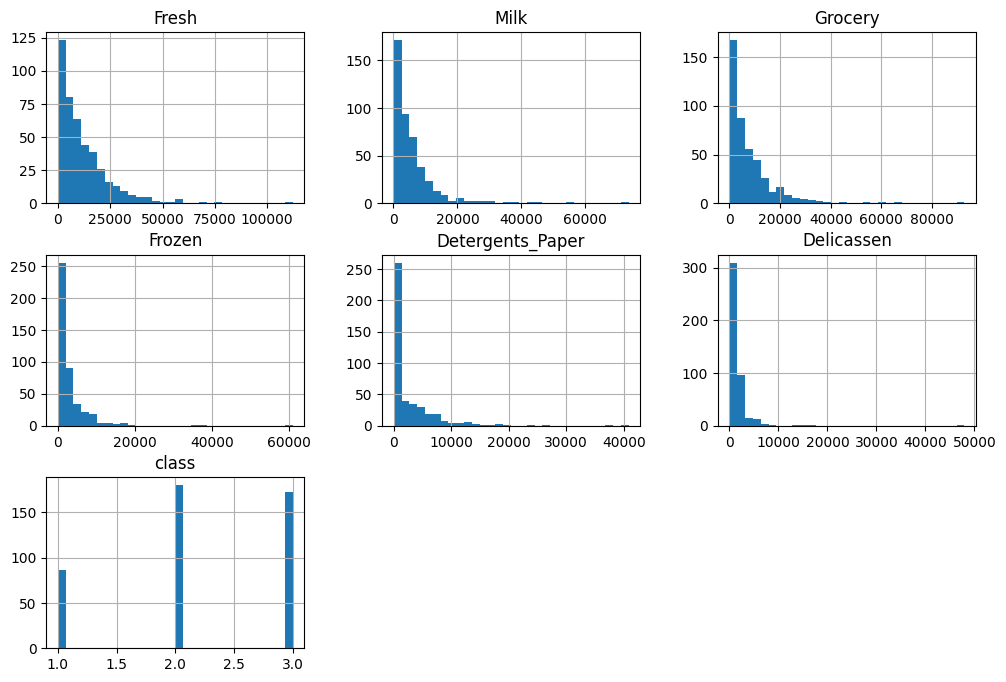

In [35]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','class']].hist(
    figsize=(12,8), bins=30)
plt.show()

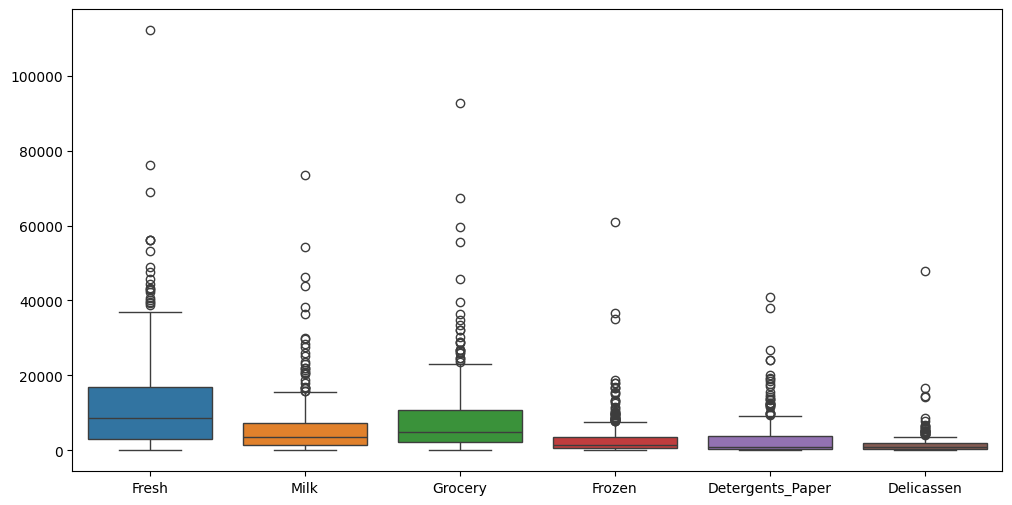

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.show()


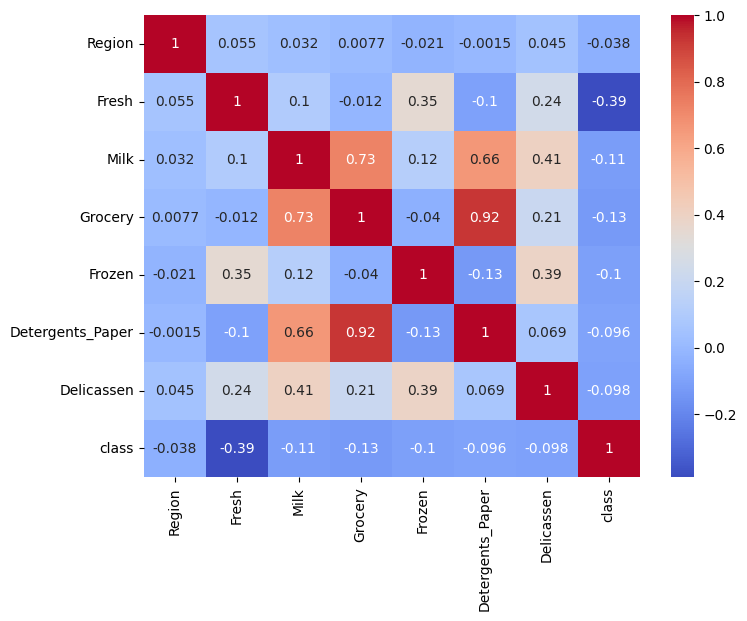

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [40]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Select only numeric features (exclude Region and class)
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

# Initialize LOF model (KNN-based)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# contamination = proportion of points treated as outliers

# Predict outliers
y_pred = lof.fit_predict(X)  # -1 = outlier, 1 = inlier
df['outlier'] = y_pred

# Keep only inliers
df_clean = df[df['outlier'] == 1].drop(columns=['outlier'])


print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original shape: (440, 9)
After outlier removal: (418, 8)


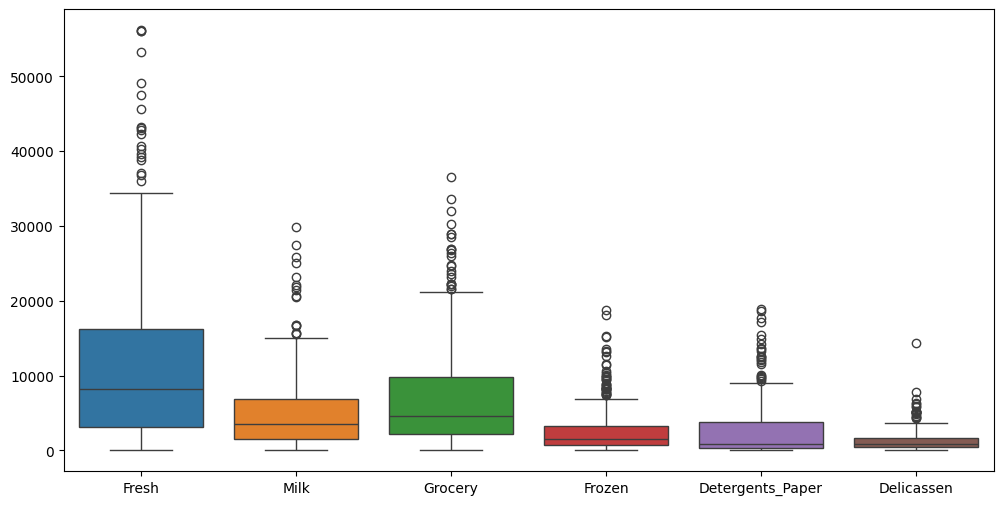

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
plt.show()

In [24]:
def sacler(a):
  return (a-a.min())/(a.max()-a.min())
print(df.columns)

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class', 'outlier'],
      dtype='object')


In [42]:
num_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df[num_cols] = sacler(df_clean[num_cols])
df = df.drop(columns=['outlier'])
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,0.225550,0.321782,0.207165,0.010115,0.141300,0.093044,2
1,3,0.125614,0.326943,0.262177,0.092957,0.174046,0.123571,2
2,3,0.113078,0.293361,0.210536,0.127368,0.185844,0.546487,2
3,3,0.236164,0.038241,0.115615,0.341379,0.026662,0.124408,1
4,3,0.402664,0.179475,0.197215,0.208177,0.093848,0.361165,1


In [54]:
def distance(a,b):
  sum=0
  for i in range(len(a)):
    sum+=(a[i]-b[i])**2
  return np.sqrt(sum)

In [58]:


# Shuffle dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 80% train, 20% test
split = int(0.8 * len(df_shuffled))

train_df = df_shuffled[:split]
test_df  = df_shuffled[split:]

# Separate features (X) and labels (y)
X_train = train_df.drop(columns=['class','Region'])  # keep only numeric features
y_train = train_df['class']

X_test = test_df.drop(columns=['class','Region'])
y_test = test_df['class']

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (352, 6) (352,)
Test shape: (88, 6) (88,)


In [52]:
from collections import Counter


def knn(x_test, k=7):
    distances = []
    for i in range(len(X_train)):
        dist = distance(np.array(X_train.iloc[i]), np.array(x_test))
        distances.append((dist, y_train.iloc[i]))

    distances.sort(key=lambda x: x[0])

    k_neighbors = [label for _, label in distances[:k]]

    most_common = Counter(k_neighbors).most_common(1)
    return most_common[0][0]


In [61]:
k_values = range(3, 18)  # 3,4,...,11
accuracies = []

for k in k_values:
    y_pred = []
    for i in range(len(X_test)):
        pred = knn(X_test.iloc[i], k=k)
        y_pred.append(pred)
    y_pred = np.array(y_pred)

    # Calculate accuracy
    acc = np.mean(y_pred == y_test.values)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")

K = 3, Accuracy = 0.8636
K = 4, Accuracy = 0.8636
K = 5, Accuracy = 0.8977
K = 6, Accuracy = 0.9205
K = 7, Accuracy = 0.9318
K = 8, Accuracy = 0.8977
K = 9, Accuracy = 0.9432
K = 10, Accuracy = 0.9091
K = 11, Accuracy = 0.9091
K = 12, Accuracy = 0.9205
K = 13, Accuracy = 0.9091
K = 14, Accuracy = 0.8977
K = 15, Accuracy = 0.9318
K = 16, Accuracy = 0.9091
K = 17, Accuracy = 0.9091
